In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
df = pd.read_csv("Salary_dataset.csv")
df = df.drop(columns=["Unnamed: 0"], errors="ignore")  # drop if exists

# Features & Target
X = np.array(df['YearsExperience']).reshape(-1, 1)
y = np.array(df['Salary'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build a simple Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),  # hidden layer
    Dense(32, activation='relu'),
    Dense(1)  # output layer (regression → no activation)
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, epochs=200, verbose=0)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Test R²:", round(r2, 4))
print("Mean Squared Error:", round(mse, 2))
print("Mean Absolute Error:", round(mae, 2))

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss over Epochs")
plt.show()

# Scatter plot with predictions
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, color='red', label="Predicted")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Neural Network Regression: Salary Prediction")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -----------------------
# Load dataset
# -----------------------
data = pd.DataFrame({
    "Hours Studied": [7,4,8,5,7,3,7,8],
    "Previous Scores": [99,82,51,52,75,78,73,45],
    "Extracurricular Activities": ["Yes","No","Yes","Yes","No","No","Yes","Yes"],
    "Sleep Hours": [9,4,7,5,8,9,5,4],
    "Sample Question Papers Practiced": [1,2,2,2,5,6,6,6],
    "Performance Index": [91.0,65.0,45.0,36.0,66.0,61.0,63.0,42.0]
})

# -----------------------
# Preprocessing
# -----------------------
# Encode categorical feature
le = LabelEncoder()
data["Extracurricular Activities"] = le.fit_transform(data["Extracurricular Activities"])  # Yes=1, No=0

# Features and target
X = data.drop(columns=["Performance Index"]).values
y = data["Performance Index"].values

# Scale features (important for NN training)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -----------------------
# Build Neural Network
# -----------------------
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),  # hidden layer
    Dense(32, activation='relu'),
    Dense(1)  # output layer (regression → no activation)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# -----------------------
# Train
# -----------------------
history = model.fit(X_train, y_train, epochs=300, verbose=0)

# -----------------------
# Predictions & Evaluation
# -----------------------
y_pred = model.predict(X_test).flatten()

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Test R²:", round(r2, 4))
print("MSE:", round(mse, 2))
print("MAE:", round(mae, 2))

# -----------------------
# Plot training loss
# -----------------------
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss over Epochs")
plt.show()


In [9]:

# ✅ For CPU-only (simpler, smaller):
# %conda install pytorch torchvision torchaudio cpuonly -c pytorch  # for conda
%pip install torch torchvision torchaudio
# for pip


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 💻 For GPU (CUDA support):

%pip install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia


Epoch [100/500], Loss: 4881835520.0000
Epoch [200/500], Loss: 99878392.0000
Epoch [300/500], Loss: 67371544.0000
Epoch [400/500], Loss: 62639796.0000
Epoch [500/500], Loss: 57831600.0000


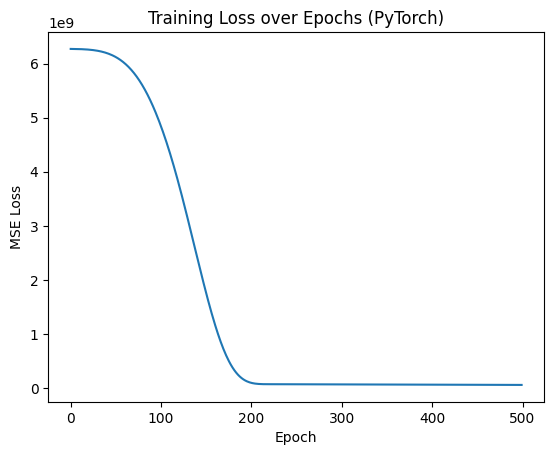

Test R²: 0.8495
Mean Squared Error: 76853896.0
Mean Absolute Error: 7355.03


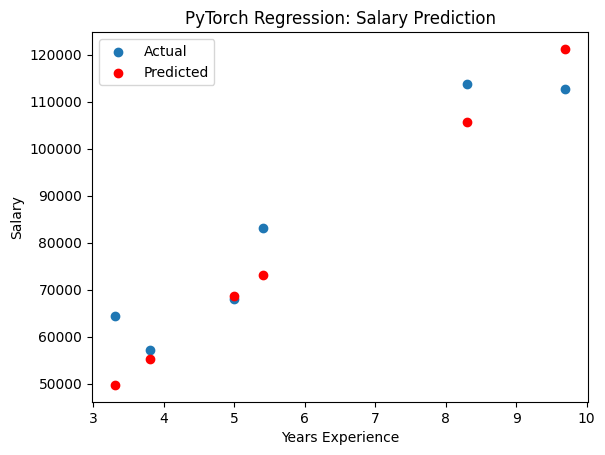

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn
import torch.optim as optim

# Load dataset
df = pd.read_csv("Salary_dataset.csv")
df = df.drop(columns=["Unnamed: 0"], errors="ignore")  # drop if exists

# Features & Target
X = np.array(df['YearsExperience']).reshape(-1, 1).astype(np.float32)
y = np.array(df['Salary']).reshape(-1, 1).astype(np.float32)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)

# Define Neural Network model
class SalaryNN(nn.Module):
    def __init__(self):
        super(SalaryNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # regression output
        )
        
    def forward(self, x):
        return self.layers(x)

model = SalaryNN()

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 500
losses = []
for epoch in range(epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Plot training loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss over Epochs (PyTorch)")
plt.show()

# Predictions
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    
y_pred = y_pred_tensor.numpy()

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Test R²:", round(r2, 4))
print("Mean Squared Error:", round(mse, 2))
print("Mean Absolute Error:", round(mae, 2))

# Scatter plot with predictions
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("PyTorch Regression: Salary Prediction")
plt.legend()
plt.show()


In [12]:
# comparision of TensorFlow and PyTorch results:

# https://chatgpt.com/share/68c7b4f3-9bd0-800b-b7d3-f0affed50227